# 2.1 Разведывательный анализ данных (EDA) - визуализация статистических данных

In [1]:
import pandas as pd
import numpy as np
import re
import unicodedata
from difflib import get_close_matches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
from typing import Union, Iterable, Optional, Tuple, List

In [2]:
df = pd.read_csv('data/rosstat_data.csv', index_col=0)
df.sample(5)

,region,pcci_mean,ri_cum,fwp_mean,rpay_cum,cmr_mean,cmu_mean,dta_mean_до_60,dta_mean_после_60,alco_mean,...,mad_mean,nm_mean,ppr_mean,ps_mean_proc_child,ps_mean_proc_pension,ps_mean_proc_work,rp_mean,rtpc_mean,wes_mean,pop_2023
9,воронежская_область,30634.2,88.9,31111.2,105.3,13.8,74.4,816814.0,1474918.0,93.14,...,54314.88,17130.198,8.94,36.0,5.0,58.0,1.079946e+09,251843.6,19.94,2285282
64,саратовская_область,21654.8,94.6,27874.2,110.5,27.8,65.4,584000.0,857206.0,65.76,...,75083.14,17206.598,15.78,39.0,6.0,55.0,9.657743e+08,157821.4,26.24,2404944
81,чувашская_республика,19075.4,93.1,27197.8,112.2,12.4,26.4,316231.0,508760.0,98.56,...,99111.56,10218.794,17.84,33.0,6.0,61.0,4.173893e+08,136751.4,23.52,1173177
26,ленинградская_область,30997.6,114.8,42791.2,106.4,13.8,36.8,442972.0,995068.0,39.54,...,58630.22,11717.196,8.92,13.0,6.0,32.0,2.167894e+09,243374.0,16.84,2023767
55,республика_саха_якутия,42811.2,102.1,68131.4,107.6,24.6,36.2,301636.0,255842.0,157.94,...,105822.94,11156.194,18.62,45.0,5.0,49.0,7.268166e+08,249393.4,14.86,997565


In [3]:
# Проверка типа данных

print(df.dtypes.value_counts())

float64    25
object      1
int64       1
Name: count, dtype: int64


> Все данные в числовом формате flot64

In [4]:
# Для более удобного анализа сделаем колонну region индексом
df = df.set_index('region')

In [ ]:
# Словарь с исходными данными

data_prefix = {
    'pcci_mean' : 'Среднедушевые денежные доходы (среднегодовой за последние 5 лет)',
    'ri_cum' : 'Накопительный индекс (за последние 5 лет % к пред. году) изменения реальных денежных доходов населения',
    'rpay_cum' : 'Накопительный индекс реальной начисленной зароботной палты (за последние 5 лет % к пред. году)',
    'fwp_mean' : 'Среднемесячная номинальная начисленная заработная плата (сренегодовое за последние 5 лет)',
    'cmr_mean' : 'Среднегодовое число умерших на первом году жизни детей в сельской местности',
    'cmu_mean' : 'Среднегодовое число умерших на первом году жизни детей в городской местности',
    'dta_mean_до_60' : 'Среднегодовое число людей с инвалидностью до 60 лет',
    'dta_mean_после_60' : 'Среднегодовое число людей с инвалидностью после 60 лет',
    'alco_mean' : 'Среднегодовая заболеваемость с впервые в жизни установленным диагнозом алкоголизма и алкогольного психоза на 100 тыс. населения',
    'drugs_mean' : 'Среднегодовая заболеваемость с впервые в жизни установленным диагнозом наркомании на 100 тыс. населения ',
    'grp_mean' : 'Среднегодовой валовой региональный продукт на душу населения, в рублях.',
    'hc_proc_НИС' : 'Процент домохозяйств, не испытывающих стесненные условия',
    'hc_proc_ИС' : 'Процент домохозяйств, испытывающих стесненные условия',
    'hc_ЖП' : 'Размер жилой площади в расчёте на члена домохозяйства',
    'hi_proc_НУЖУ' : 'Процент домохозяцств, неудовлетварённых жилищными условиями',
    'hi_proc_УЖУ' : 'Процент домохозяцств, удовлетварённых жилищными условиями',
    'mad_mean' : 'Среднегодовоя заболеваемость по всем группам населения на 100 тыс. чел',
    'nm_mean' : 'Среднегодовое количество новорожденных',
    'pop_2023' : 'Численность населения по регионам и федеральным округам за 2023 год',
    'ppr_mean' : 'Среднегодовой процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума)',
    'ps_mean_proc_child' : 'Среднегодовое распределение малоимущего населения по социально-демографическим группам (дети) по регионам',
    'ps_mean_proc_work' : 'Среднегодовое распределение малоимущего населения по социально-демографическим группам (трудящиеся) по регионам',
    'ps_mean_proc_pension' : 'Среднегодовое распределение малоимущего населения по социально-демографическим группам (пенсионеры) по регионам',
    'rp_mean' : 'Общий среднегодовой объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами',
    'rtpc_mean' : 'Среднегодовой оборот розничной торговли на душу населения, в рублях.',
    'wes_mean' : 'Среднегодовые расходы на социальную политику от общих расходов бюджета региона, % в год'
}

## 2.1.1. Матрица корреляций

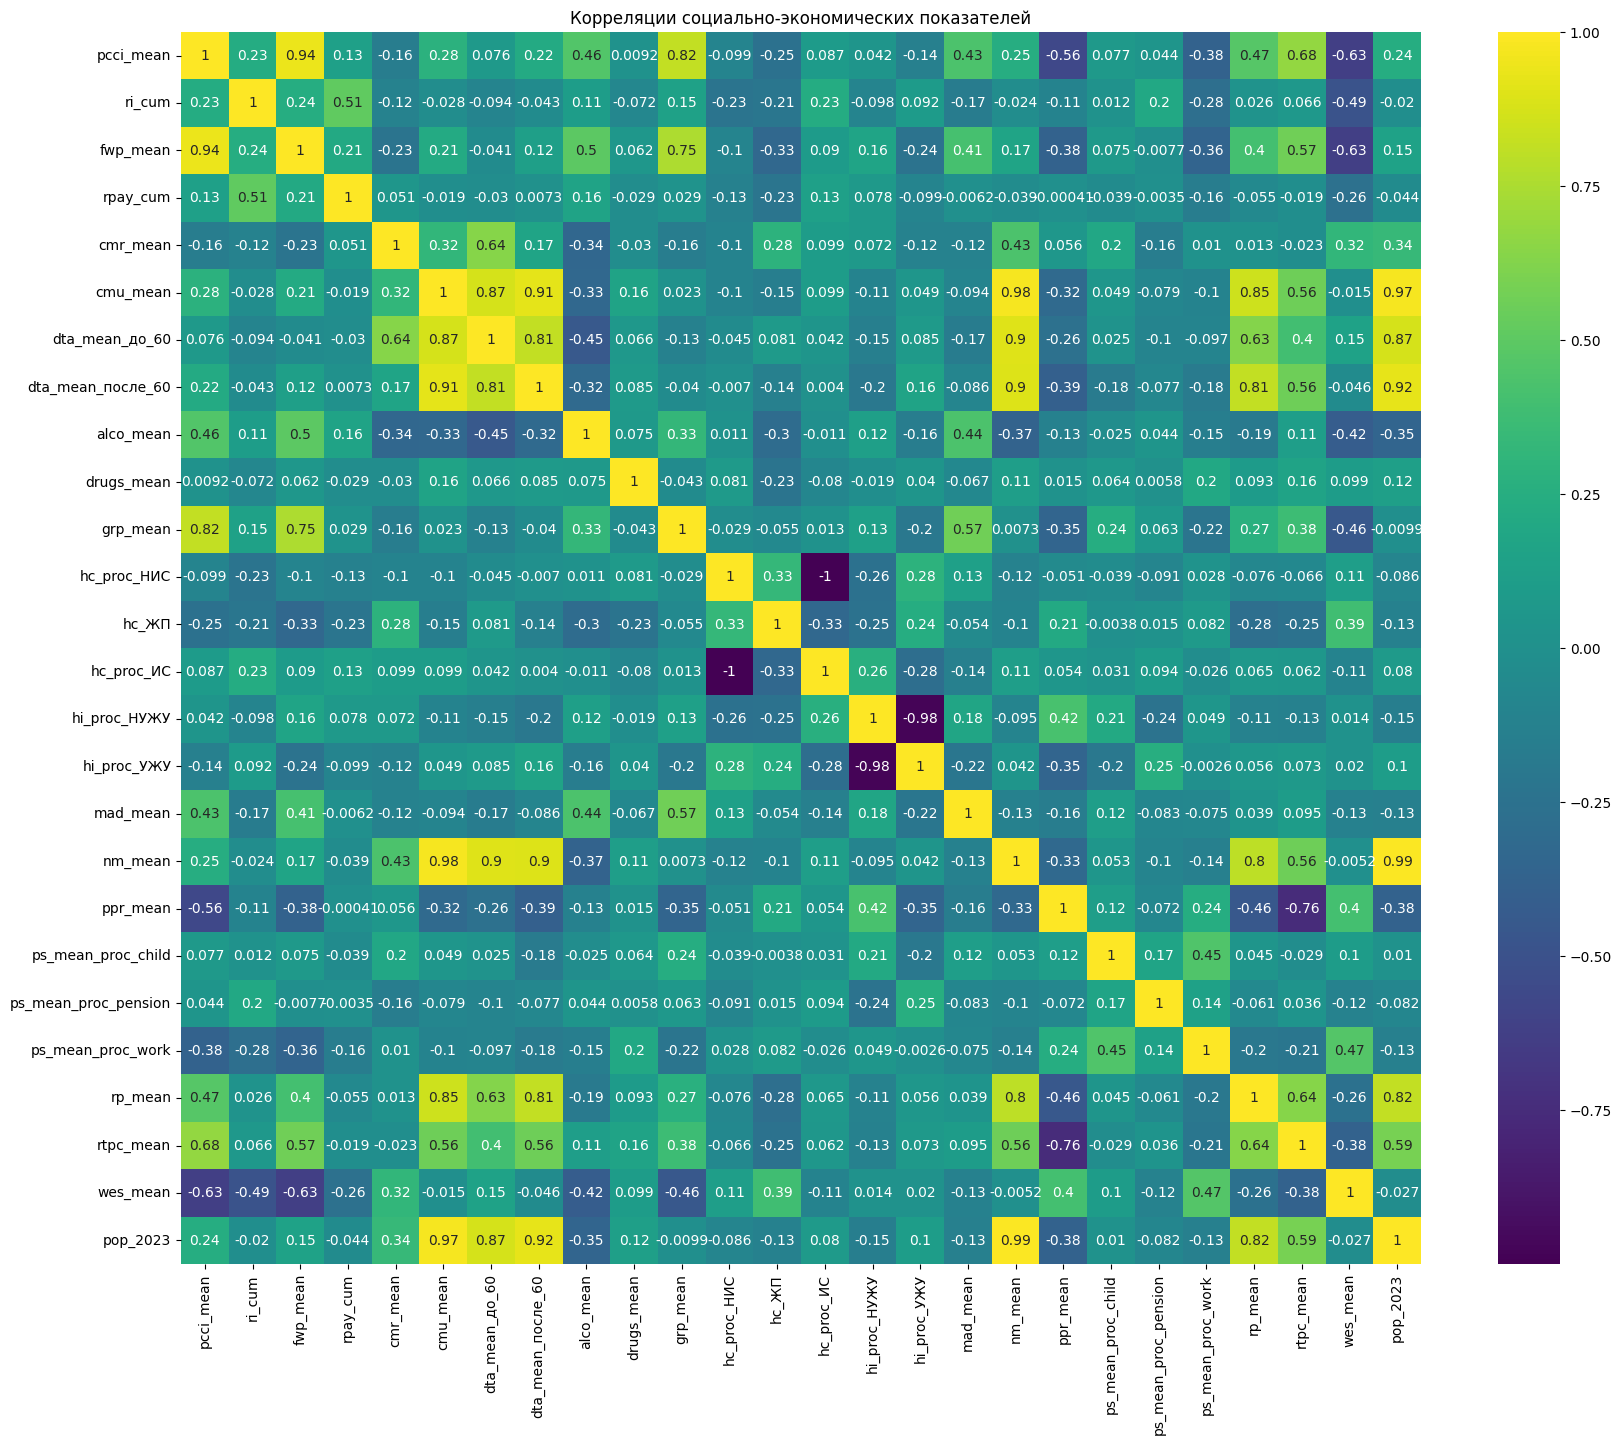

In [6]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis", center=0)
plt.title("Корреляции социально-экономических показателей")
plt.show()


> Можем выделить несколько признаков, коррелирующих с **ppr_mean - Среднегодовой процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума)**:

- Сильная обратная связь - ***rtpc_mean***

- Cредняя обратная связь - ***pcci_mean***

- Слабая обратная связь:
    - ***fwp_mean,*** 
    - ***cmu_mean,***
    - ***dta_mean_после_60,*** 
    - ***grp_mean,***
    - ***hi_proc_УЖУ,*** 
    - ***nm_mean*** 
    - ***pop_2023***

- Слабая связь:
    - ***hi_proc_НУЖУ***, 
    - ***wes_mean***

> Исключим мультиколлинеарные и неколлиниарные признаки:
 - ri_cum - удаляем
 - hi_proc_УЖУ - удаляем
 - hc_ЖП, hc_НИС - удаляем
 - Сделаем общий признак dta_mean (в процентах) = dta_mean_после_60 + dta_mean_до_60 (Среднегодовое число людей с инвалидностью)
 - Признак drugs_mean удаляем, так как он не коррелирует ни с одним признаком

## 2.1.2 Статистические зависимости

In [7]:
df_clean = df.drop(['ri_cum', 'hi_proc_УЖУ', 'hc_ЖП', 'hc_proc_НИС','drugs_mean', 'dta_mean_после_60', 'dta_mean_до_60'],axis=1)

In [8]:
df_clean['dta_proc'] = (df['dta_mean_после_60']+df['dta_mean_до_60'])/df['pop_2023']*100

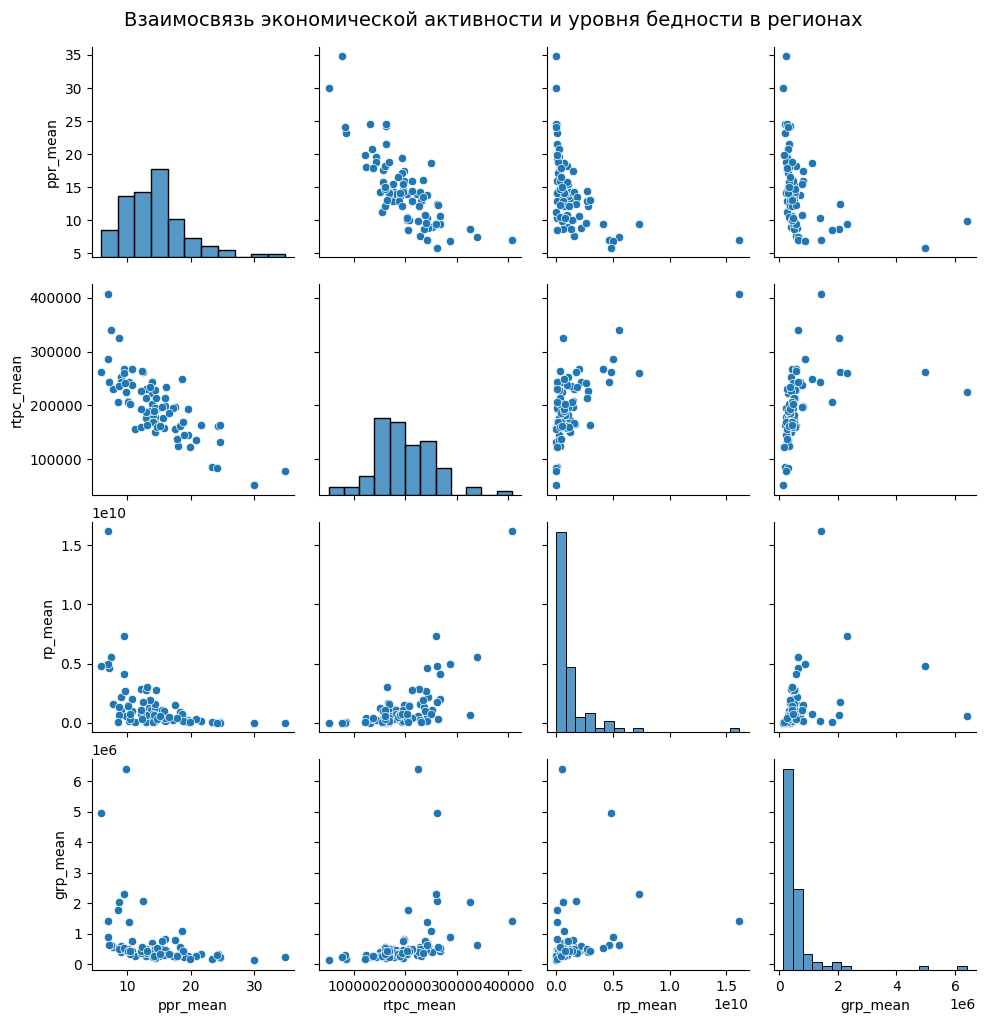

In [12]:
# таргет = Среднегодовой процент людей, живущих за чертой бедности
target = "ppr_mean"

# Экономическая активность
sns.pairplot(df_clean[[target, "rtpc_mean", "rp_mean", "grp_mean"]])
plt.suptitle("Взаимосвязь экономической активности и уровня бедности в регионах", fontsize=14, y = 1.02)
plt.show()

> Наблюдается взаимосвязь экономической активности региона и распределения малоимущего населения (ppr_):

- Явно выраженная линейная зависимость признаков ppr_ и rtpc *(Оборот розничной торговли)*
- Также наблюдается наблюдаетсякорреляция между ppr_ и rp_, grp_ *(Показатель ВРП и Объём производимых товаров на импорт)*

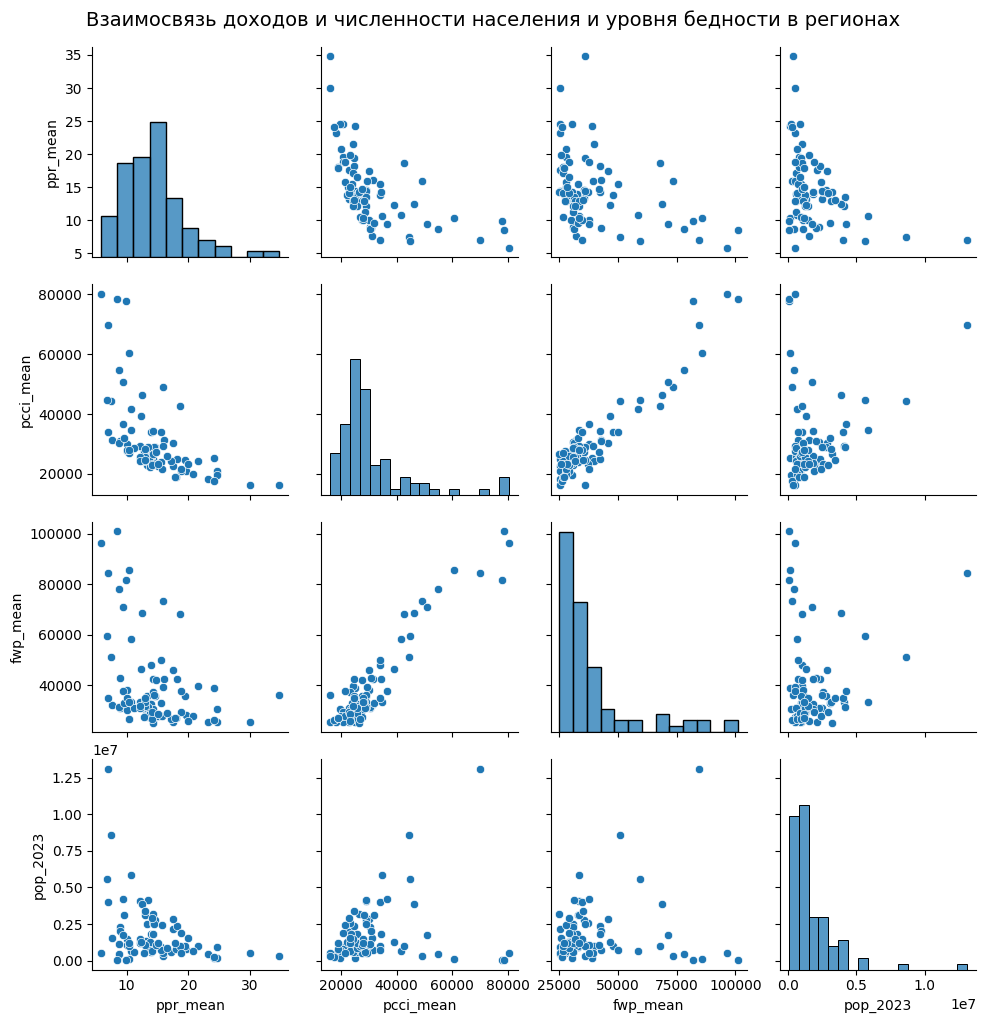

In [ ]:
# Доходы населения
sns.pairplot(df_clean[[target, "pcci_mean", "fwp_mean", "pop_2023"]])
plt.suptitle("Взаимосвязь доходов и численности населения и уровня бедности в регионах", fontsize=14, y=1.02)
plt.show()

> Нелинейная обратная зависимости ppr и pcci (Среднедушевые доходы)

> Более слабая связь ppr b pop (Численность населения)

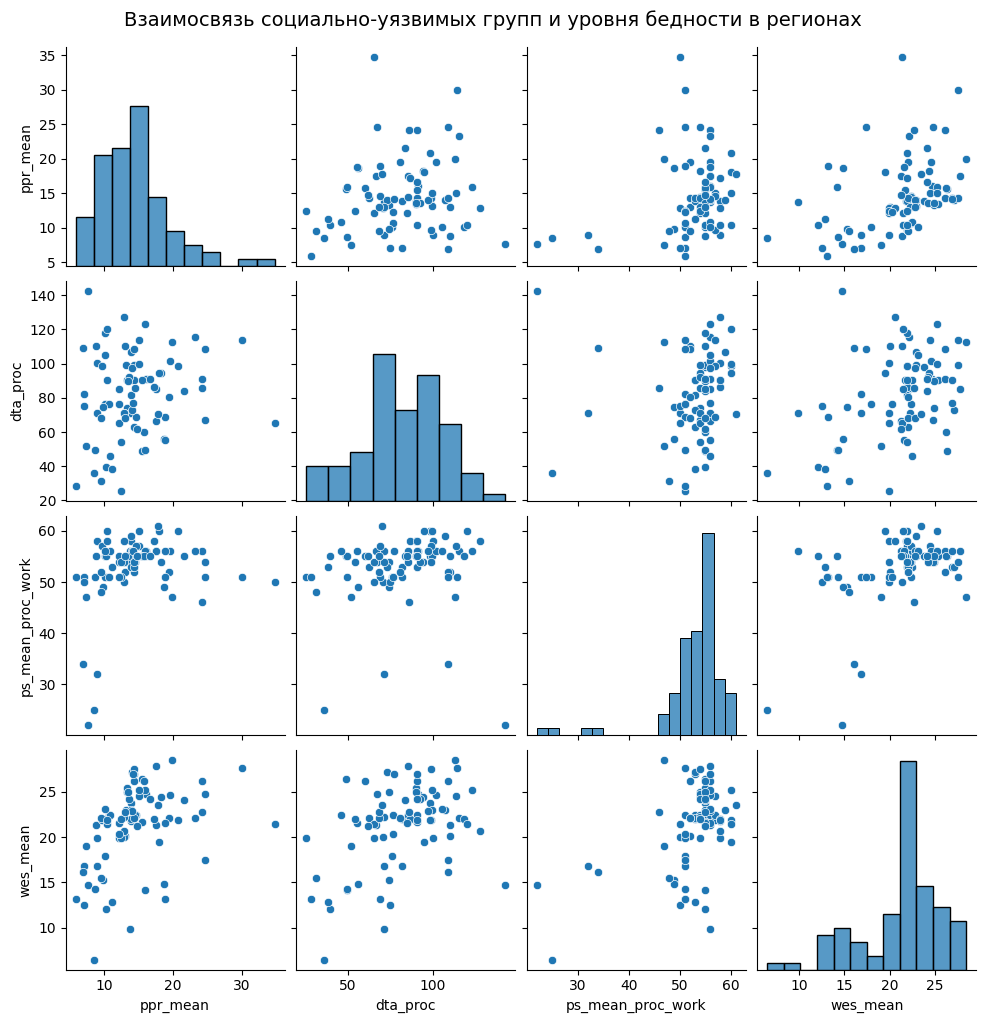

In [13]:
# Социально уязвимые группы 

sns.pairplot(df_clean[[target, "dta_proc", "ps_mean_proc_work", 'wes_mean']])
plt.suptitle("Взаимосвязь социально-уязвимых групп и уровня бедности в регионах", fontsize=14, y = 1.02)
plt.show()

> наблюдается зависимость признаков wes_ и ppr_

***Чемы выше процент расходов на социальную политику, тем выше процент людей живущих за чертой бедностью***
> Предварительно можно сделать вывод, что данная зависимость актуальна для бедных регионов.



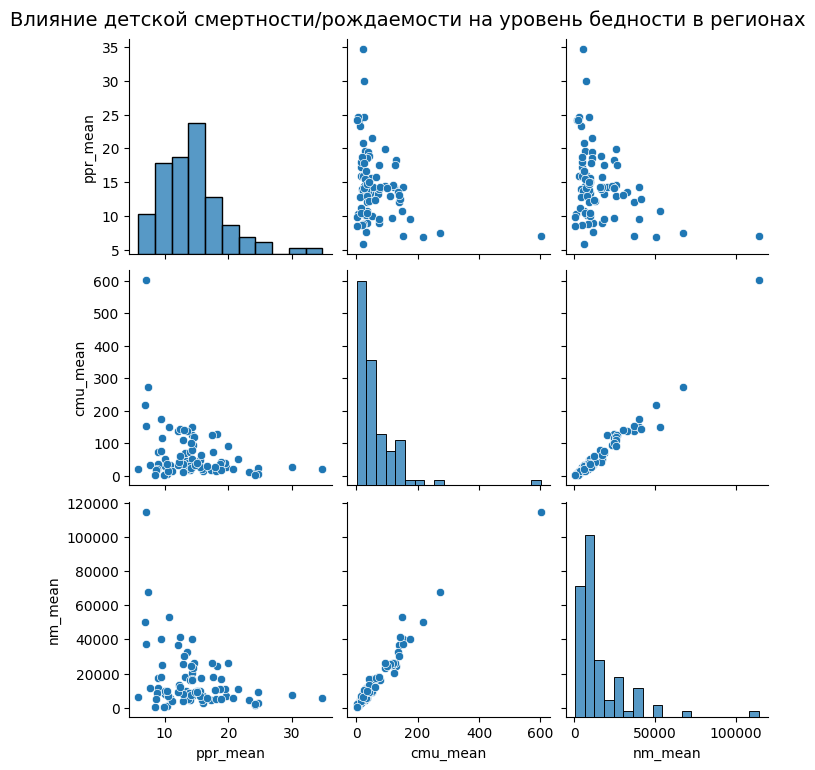

In [15]:
# Детская смертность/рождаемость

sns.pairplot(df_clean[[target, "cmu_mean", "nm_mean"]])
plt.suptitle("Влияние детской смертности/рождаемости на уровень бедности в регионах", fontsize=14, y = 1.02)
plt.show()

> Пряма корреляция детской смертности в сельской местности и количества новорожденных

> Слабое влияния на показатель уровня бедности (ppr) - чемы выше рождаемость и смертность, тем ниже уровень бедности

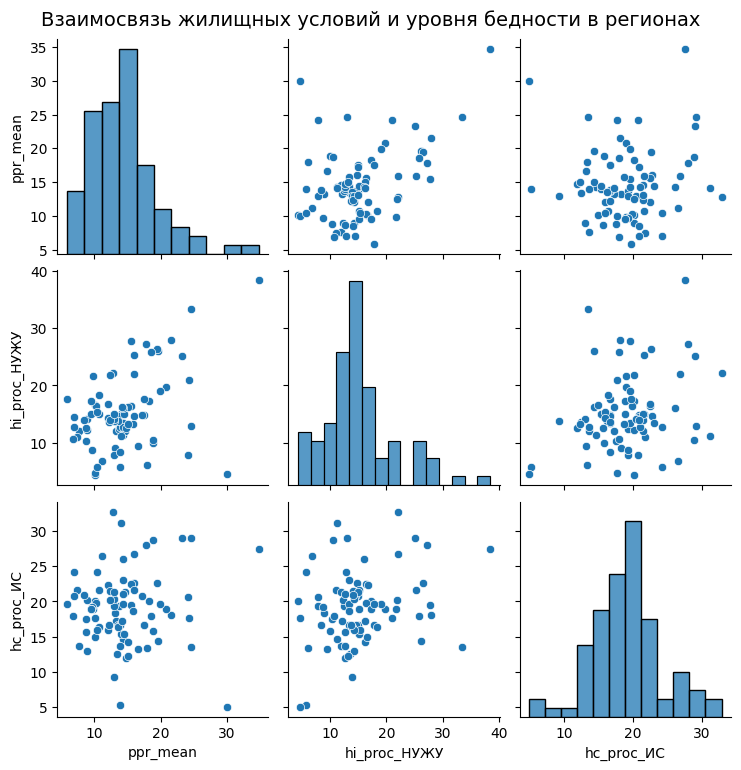

In [16]:
# Жилищные условия

sns.pairplot(df_clean[[target, "hi_proc_НУЖУ", "hc_proc_ИС"]])
plt.suptitle("Взаимосвязь жилищных условий и уровня бедности в регионах", fontsize=14, y = 1.02)
plt.show()

> Есть слабая связь между показателями жилищных условий и уровня бедности в регионе

Чем больше неудовлетварённых жилищными условиями, тем выше уровень бедности

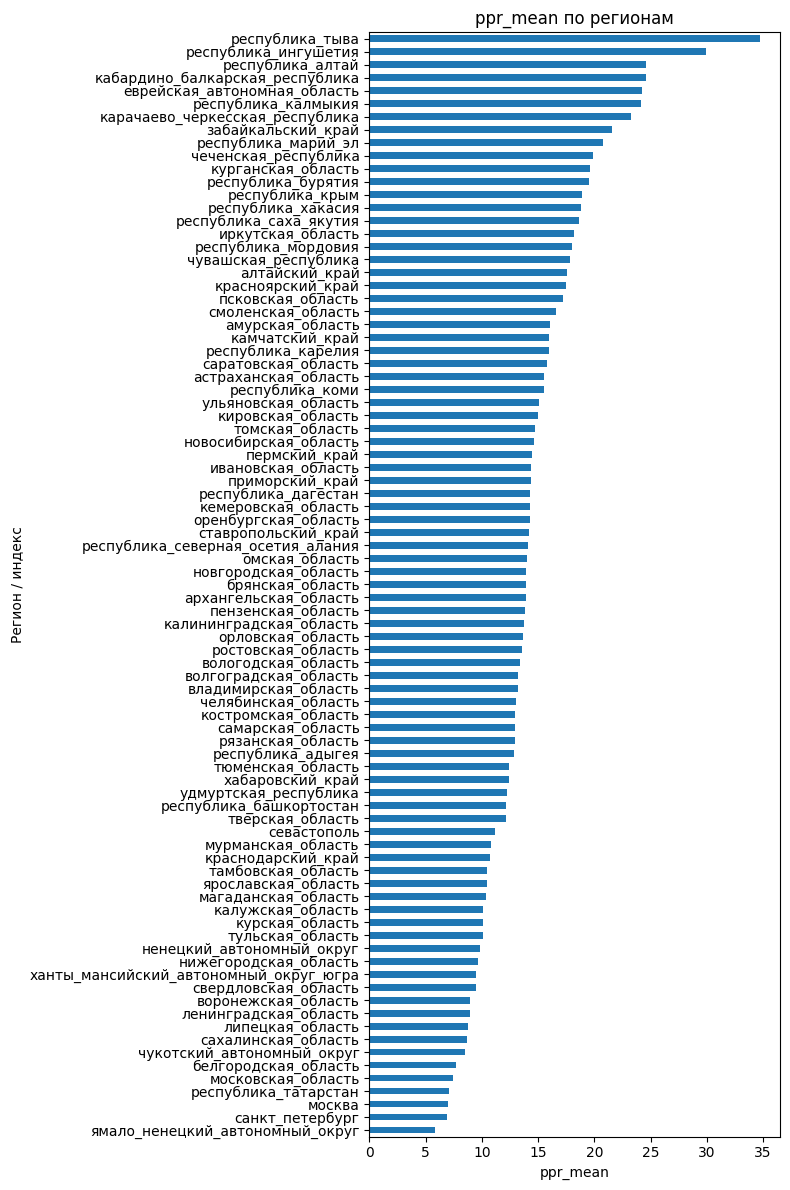

In [19]:
# Гравической отображение регионов по доле малоимущих (от большего к меньшему)

# сортировка по значению
ppr_sorted = df_clean["ppr_mean"].sort_values()

# построение горизонтальной гистограммы
ppr_sorted.plot(kind="barh", figsize=(8,12))

plt.title("ppr_mean по регионам")
plt.xlabel("ppr_mean")
plt.ylabel("Регион / индекс")
plt.tight_layout()
plt.show()

> **Проверим пересечение регионов с наименьшим и наибольшим показателем уровня бедности с другими признаками:**

## 2.1.3. Предварительное разбиение на группы

In [26]:
list_corr = ['hi_proc_НУЖУ', 'wes_mean']
list_reverse_corr = ['rtpc_mean', 'pcci_mean', 'fwp_mean', 'cmu_mean','dta_proc', 'grp_mean', 'hi_proc_НУЖУ', 'nm_mean', 'pop_2023']

In [27]:
intersec_low = {}
intersec_high = {}

for i in list_corr:
    # индексы топ-15 "низких" и "высоких" по признаку i
    low_idx = set(df_clean[i].sort_values().index[:15])     # 15 минимальных
    high_idx = set(df_clean[i].sort_values().index[-15:])   # 15 максимальных

    # пересечение с top-5 ppr
    low_ppr  = set(ppr_sorted.index[:15])   # 15 минимальных по ppr
    high_ppr = set(ppr_sorted.index[-15:])  # 15 максимальных по ppr

    intersec_low[i]  = low_idx & low_ppr
    intersec_high[i] = high_idx & high_ppr
    
reverse_intersec_low = {}
reverse_intersec_high = {}

for i in list_reverse_corr:
    # индексы топ-5 "низких" и "высоких" по признаку i
    low_idx = set(df_clean[i].sort_values().index[:15])     # 15 минимальных
    high_idx = set(df_clean[i].sort_values().index[-15:])   # 15 максимальных

    # пересечение с top-5 ppr
    low_ppr  = set(ppr_sorted.index[:15])   # 15 минимальных по ppr
    high_ppr = set(ppr_sorted.index[-15:])  # 15 максимальных по ppr

    reverse_intersec_low[i]  = high_idx & low_ppr
    reverse_intersec_high[i] = low_idx & high_ppr


In [28]:
# формируем DataFrame со списками регионов
df_intersections = pd.DataFrame({
    "ppr_min_corr": {k: ", ".join(v) if v else "-" for k, v in intersec_low.items()},
    "ppr_max_corr": {k: ", ".join(v) if v else "-" for k, v in intersec_high.items()},
    "ppr_min_corr": {k: ", ".join(v) if v else "-" for k, v in reverse_intersec_low.items()},
    "ppr_max_corr": {k: ", ".join(v) if v else "-" for k, v in reverse_intersec_high.items()}
})
df_intersections

,ppr_min_corr,ppr_max_corr
rtpc_mean,"ямало_ненецкий_автономный_округ, воронежская_о...","карачаево_черкесская_республика, республика_ал..."
pcci_mean,"ямало_ненецкий_автономный_округ, свердловская_...","республика_хакасия, республика_алтай, карачаев..."
fwp_mean,"ямало_ненецкий_автономный_округ, ханты_мансийс...","карачаево_черкесская_республика, кабардино_бал..."
cmu_mean,"свердловская_область, республика_татарстан, мо...","карачаево_черкесская_республика, республика_ал..."
dta_proc,"белгородская_область, санкт_петербург, липецка...","республика_хакасия, республика_саха_якутия"
grp_mean,"ямало_ненецкий_автономный_округ, ханты_мансийс...","карачаево_черкесская_республика, республика_ал..."
hi_proc_НУЖУ,ненецкий_автономный_округ,"республика_ингушетия, республика_калмыкия, рес..."
nm_mean,"свердловская_область, республика_татарстан, мо...","республика_хакасия, республика_алтай, карачаев..."
pop_2023,"свердловская_область, республика_татарстан, ни...","республика_хакасия, республика_алтай, карачаев..."


In [29]:
# Богатые регионы
unique_regions_min = set(
    df_intersections['ppr_min_corr']
    .str.split(',')
    .explode()
    .str.strip()
)
print(unique_regions_min)

# Бедные регионы
unique_regions_max = set(
    df_intersections['ppr_max_corr']
    .str.split(',')
    .explode()
    .str.strip()
)
print(unique_regions_max)

{'ямало_ненецкий_автономный_округ', 'воронежская_область', 'свердловская_область', 'липецкая_область', 'республика_татарстан', 'ханты_мансийский_автономный_округ_югра', 'московская_область', 'ленинградская_область', 'нижегородская_область', 'белгородская_область', 'сахалинская_область', 'чукотский_автономный_округ', 'санкт_петербург', 'москва', 'ненецкий_автономный_округ'}
{'карачаево_черкесская_республика', 'республика_алтай', 'республика_хакасия', 'республика_марий_эл', 'кабардино_балкарская_республика', 'еврейская_автономная_область', 'республика_калмыкия', 'республика_бурятия', 'республика_ингушетия', 'чеченская_республика', 'республика_саха_якутия', 'республика_тыва', 'курганская_область', 'республика_крым'}


**Предварительно выделим наиболее богатые и бедные регионы по кластерам (на 3 группы)**
- Кластер 0 - регионы с высокой долей малоимущих граждан
- Кластер 1 - не оппали в группу
- Кластер 2 - регионы с низкой долей малоимущих граждан

In [30]:
#
df_clean['cluster_beta'] = np.where(
    df_clean.index.isin(unique_regions_min), 0,  # бедные
    np.where(
        df_clean.index.isin(unique_regions_max), 2,  # богатые
        1  # не попали
    )
)

clusters_beta = df_clean['cluster_beta']

df_clean = df_clean.drop('cluster_beta', axis = 1)


In [31]:
df_clean.to_csv('data/rosstat_data_clean.csv')

clusters_beta.to_csv('data/clusters.csv')

# Выводы по разделу 2.1

Проведён визуальный графический анализ взаимосвязи переменныx

Наблюдается сильная обратная зависимость оборота розничной торговли и уровня бедности в регионе

Также оказывает некоторое влияние: 
количество людей с инвалидностьюв регионах, 
уровень ВРП, 
процент детской смертности и рождаемости

Высокий показатель малоимущего населения (бедности) коррелирует с невысокой численностью населения в регионе

Процент расходов на социальную политику выше в бедных регионах, предположительно это связано с общим низким бюджетом в регионе.

Предварительно выполнено разбиение на кластеры ручным способом

> Наименее нуждающиеся в помощи регионы (кластер 0):

 - 'белгородская_область',
 - 'воронежская_область',
 - 'ленинградская_область',
 - 'липецкая_область',
 - 'москва',
 - 'московская_область',
 - 'ненецкий_автономный_округ',
 - 'нижегородская_область',
 - 'республика_татарстан',
 - 'санкт_петербург',
 - 'сахалинская_область',
 - 'свердловская_область',
 - 'ханты_мансийский_автономный_округ_югра',
 - 'чукотский_автономный_округ',
 - 'ямало_ненецкий_автономный_округ'


> Наиболее нуждающиеся в помощи регионы (Кластер 2):

- 'республика_ингушетия', 
- 'республика_калмыкия', 
- 'республика_марий_эл', 
- 'кабардино_балкарская_республика', 
- 'республика_бурятия', 
- 'карачаево_черкесская_республика', 
- 'республика_хакасия', 
- 'республика_тыва', 
- 'республика_крым', 
- 'чеченская_республика', 
- 'республика_саха_якутия', 
- 'еврейская_автономная_область', 
- 'курганская_область', 
- 'республика_алтай'

> Регионы, не оппавшие ни в один из кластеров (Кластер 1):